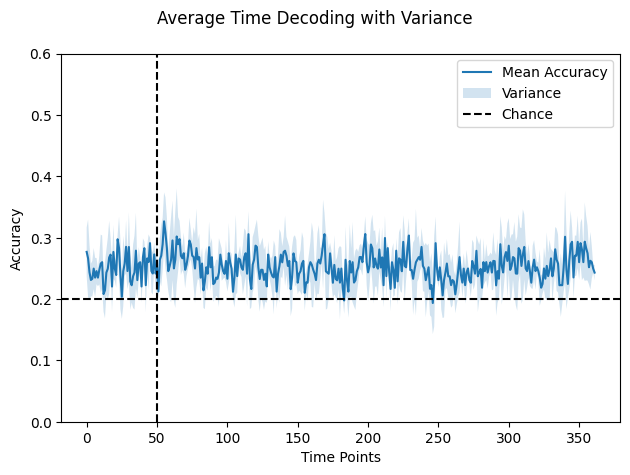

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_average_time_decoding_with_variance(file_paths, title, subj, n_classes):
    # Read the data from the specified files
    data_list = [np.load(file_path) for file_path in file_paths]
    
    # Calculate mean and standard deviation
    scores_mean = np.mean(data_list, axis=0)
    scores_std = np.std(data_list, axis=0)
    
    # Plotting
    n_time_points = scores_mean.shape[0]
    time_points = np.arange(n_time_points)
    
    plt.plot(time_points, scores_mean, label='Mean Accuracy')
    plt.fill_between(time_points, scores_mean - scores_std, scores_mean + scores_std, alpha=0.2, label='Variance')
    plt.ylim(0, 0.6)
    plt.axhline(1/n_classes, color='k', linestyle='--', label='Chance')
    plt.axvline(50, color='k', linestyle='--')
    plt.xlabel('Time Points')
    plt.ylabel('Accuracy')
    plt.suptitle(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usage
file_paths = [
    'output/R2280/R2280_group_start.npy',
    'output/R2487/R2487_group_start.npy',
    'output/R2488/R2488_group_start.npy',
    'output/R2490/R2490_group_start.npy'
]
plot_average_time_decoding_with_variance(file_paths, 'Average Time Decoding with Variance', 'Subject', n_classes=5)

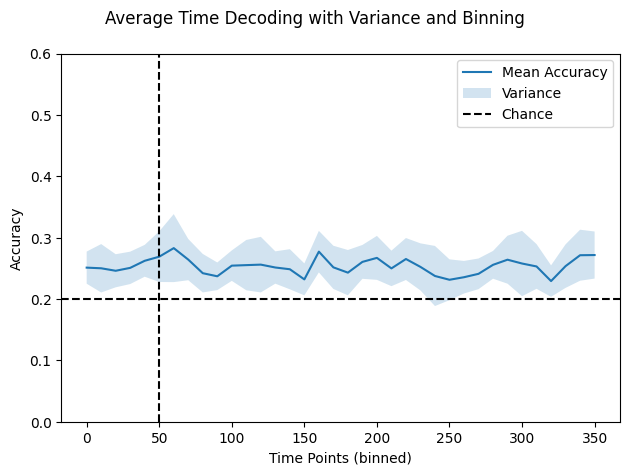

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_average_time_decoding_with_variance_and_binning(file_paths, title, subj, n_classes, bin_size=10):
    # Read the data from the specified files
    data_list = [np.load(file_path) for file_path in file_paths]
    
    # Calculate mean and standard deviation
    scores_mean = np.mean(data_list, axis=0)
    scores_std = np.std(data_list, axis=0)
    
    # Reshape and average every `bin_size` time points
    n_time_points = scores_mean.shape[0]
    n_bins = n_time_points // bin_size
    binned_mean = scores_mean[:n_bins * bin_size].reshape(n_bins, bin_size).mean(axis=1)
    binned_std = scores_std[:n_bins * bin_size].reshape(n_bins, bin_size).mean(axis=1)
    
    # Plotting
    time_points = np.arange(n_bins) * bin_size
    
    plt.plot(time_points, binned_mean, label='Mean Accuracy')
    plt.fill_between(time_points, binned_mean - binned_std, binned_mean + binned_std, alpha=0.2, label='Variance')
    plt.ylim(0, 0.6)
    plt.axhline(1/n_classes, color='k', linestyle='--', label='Chance')
    plt.axvline(50, color='k', linestyle='--')
    plt.xlabel('Time Points (binned)')
    plt.ylabel('Accuracy')
    plt.suptitle(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usage
file_paths = [
    'output/R2280/R2280_group_start.npy',
    'output/R2488/R2488_group_start.npy',
    'output/R2490/R2490_group_start.npy'
]
plot_average_time_decoding_with_variance_and_binning(file_paths, 'Average Time Decoding with Variance and Binning', 'Subject', n_classes=5)